# Car or Bike Classification Computer Vision

In [2]:
# Car or Bike Classification 

![Alt text](https://img.redbull.com/images/q_auto,f_auto/redbullcom/2016/01/27/1331773230339_2/it-can-be-tricky-to-fit-a-bike-into-a-car-neatly..jpg)

In [1]:
#libraries

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import matplotlib.pyplot as plt
import numpy as np

In [3]:
#load the data

In [12]:
base_dir = "/kaggle/input/car-vs-bike-classification-dataset/Car-Bike-Dataset"
bike_dir = os.path.join(base_dir, "Bike")
car_dir = os.path.join(base_dir, "Car")

# Check bike directory files and read images
bike_files = [img for img in os.listdir(bike_dir) if img.endswith(('.png', '.jpg', '.jpeg'))]
bike_images = [cv2.cvtColor(cv2.imread(os.path.join(bike_dir, img)), cv2.COLOR_BGR2RGB) for img in bike_files]

# Check car directory files and read images
car_files = [img for img in os.listdir(car_dir) if img.endswith(('.png', '.jpg', '.jpeg'))]
car_images = [cv2.cvtColor(cv2.imread(os.path.join(car_dir, img)), cv2.COLOR_BGR2RGB) for img in car_files]


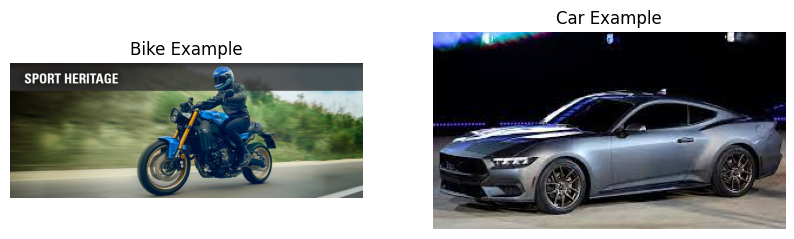

In [13]:

# A sample picture of both classes
bike_example = bike_images[0]
car_example = car_images[0]

# Show pictures
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(bike_example)
plt.title('Bike Example')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(car_example)
plt.title('Car Example')
plt.axis('off')

plt.show()



In [14]:
# size of pictures
img_size = (128, 128)

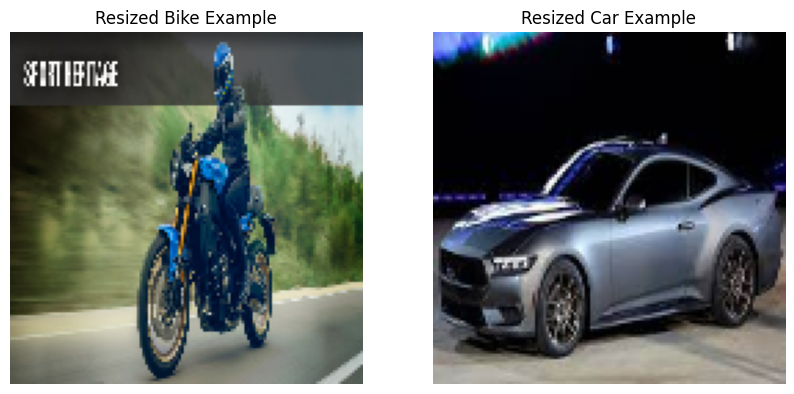

In [15]:
import os
import cv2
import numpy as np

# Cell images path on Kaggle
base_dir = "/kaggle/input/car-vs-bike-classification-dataset/Car-Bike-Dataset"
bike_dir = os.path.join(base_dir, "Bike")
car_dir = os.path.join(base_dir, "Car")

# Size of pictures
img_size = (128, 128)

# Function to resize images
def resize_images(image_list):
    return [cv2.resize(image, img_size) for image in image_list]

# Check bike directory files and resize existing images
bike_files = [img for img in os.listdir(bike_dir) if img.endswith(('.png', '.jpg', '.jpeg'))]
bike_images = [cv2.cvtColor(cv2.imread(os.path.join(bike_dir, img)), cv2.COLOR_BGR2RGB) for img in bike_files]
bike_images_resized = resize_images(bike_images)

# Check car directory files and resize existing images
car_files = [img for img in os.listdir(car_dir) if img.endswith(('.png', '.jpg', '.jpeg'))]
car_images = [cv2.cvtColor(cv2.imread(os.path.join(car_dir, img)), cv2.COLOR_BGR2RGB) for img in car_files]
car_images_resized = resize_images(car_images)

# Example: Display the first resized image from each class
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(bike_images_resized[0])
plt.title('Resized Bike Example')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(car_images_resized[0])
plt.title('Resized Car Example')
plt.axis('off')

plt.show()


In [16]:
# Convert bike and car images to numpy arrays
bike_images_resized = np.array(bike_images_resized)
car_images_resized = np.array(car_images_resized)

# Prepare labels
bike_labels = np.ones(len(bike_images_resized))
car_labels = np.zeros(len(car_images_resized))

In [17]:
from sklearn.model_selection import train_test_split

# Concatenate bike and car images
all_images = np.concatenate([bike_images_resized, car_images_resized])

# Concatenate bike and car labels
all_labels = np.concatenate([bike_labels, car_labels])

# Data split
X_train, X_valid, y_train, y_valid = train_test_split(all_images, all_labels, test_size=0.2, random_state=42)

# Normalization
X_train = X_train / 255.0
X_valid = X_valid / 255.0


In [18]:
#chek data
print("X_train shape:", X_train.shape)
print("X_valid shape:", X_valid.shape)
print("y_train shape:", y_train.shape)
print("y_valid shape:", y_valid.shape)

X_train shape: (3196, 128, 128, 3)
X_valid shape: (800, 128, 128, 3)
y_train shape: (3196,)
y_valid shape: (800,)


In [19]:
# mdoeling
model = Sequential()

# Convolutional Layer 1
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(MaxPooling2D(2, 2))

# Convolutional Layer 2
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))

# Convolutional Layer 3
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))

# Flatten layer
model.add(Flatten())

# Fully connected layers
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# model compailing
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# mdoel summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 128)       0

In [20]:
#model fiting
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_valid, y_valid))

Epoch 1/10
100/100 [==============================] - 56s 542ms/step - loss: 0.4627 - accuracy: 0.7688 - val_loss: 0.2779 - val_accuracy: 0.8925
Epoch 2/10
100/100 [==============================] - 52s 523ms/step - loss: 0.2286 - accuracy: 0.9099 - val_loss: 0.2112 - val_accuracy: 0.9212
Epoch 3/10
100/100 [==============================] - 53s 532ms/step - loss: 0.1684 - accuracy: 0.9387 - val_loss: 0.1896 - val_accuracy: 0.9262
Epoch 4/10
100/100 [==============================] - 53s 527ms/step - loss: 0.1215 - accuracy: 0.9571 - val_loss: 0.2028 - val_accuracy: 0.9262
Epoch 5/10
100/100 [==============================] - 54s 539ms/step - loss: 0.0756 - accuracy: 0.9706 - val_loss: 0.2142 - val_accuracy: 0.9287
Epoch 6/10
100/100 [==============================] - 52s 523ms/step - loss: 0.0705 - accuracy: 0.9734 - val_loss: 0.3076 - val_accuracy: 0.9025
Epoch 7/10
100/100 [==============================] - 51s 513ms/step - loss: 0.0492 - accuracy: 0.9840 - val_loss: 0.2225 - val_ac

In [22]:
validation_loss, validation_accuracy = model.evaluate(X_valid, y_valid)

# Print the evaluation results
print(f'Validation Loss: {validation_loss}')
print(f'Validation Accuracy: {validation_accuracy}')


25/25 [==============================] - 4s 141ms/step - loss: 0.3494 - accuracy: 0.9337
Validation Loss: 0.34936580061912537
Validation Accuracy: 0.9337499737739563


In [24]:
#save model
import joblib
joblib.dump(model, 'model_crs_bk.joblib')

['model_crs_bk.joblib']

In [ ]:
#sources

Zafer Acar Notes , ["https://chat.openai.com/"]